### Question 10.1

In [1]:
#Setting parts
set.seed(10)
install.packages('tree')
library(randomForest)
library(caret)
library(tree)

package 'tree' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ashka\AppData\Local\Temp\RtmpWwOYQq\downloaded_packages


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.
Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [2]:
#Read the data 
data_raw<-read.table(file = 'C:/Users/ashka/Dropbox/GitHub/ISYE6501_Analytics_Modelling/HW7/uscrime.txt', header=TRUE)

In [3]:
#Build the model
# crime_tree_model<-tree(Crime ~. , data=uscrime)
crime_tree_model <- tree(formula = Crime ~. , data = data_raw)
summary(crime_tree_model)


Regression tree:
tree(formula = Crime ~ ., data = data_raw)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

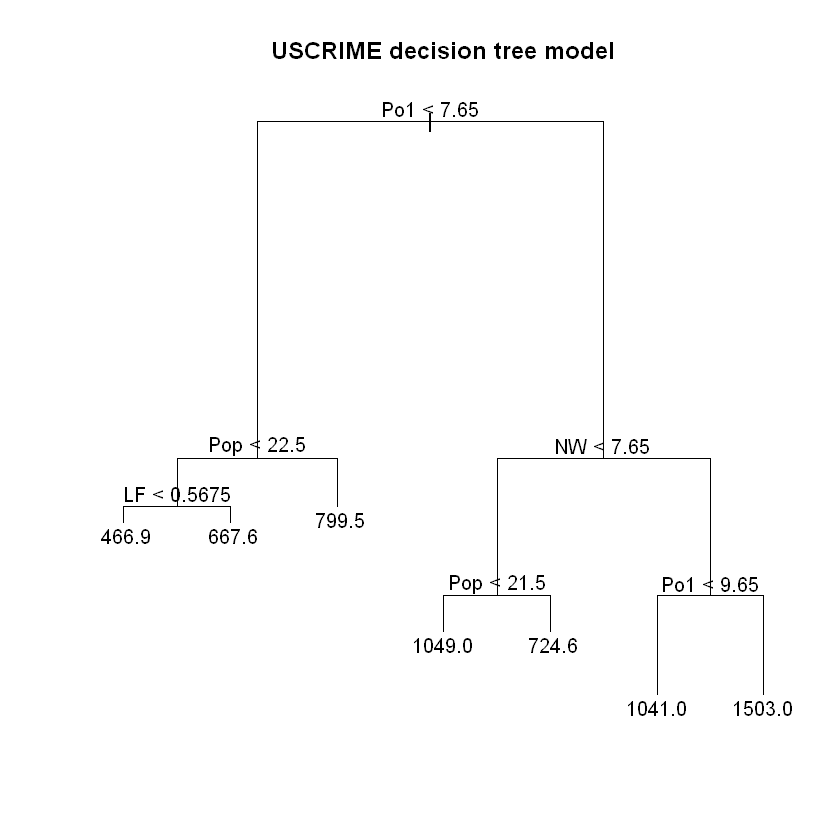

In [4]:
# Test method to check the error rate
plot(crime_tree_model)
text(crime_tree_model)
title('USCRIME decision tree model')

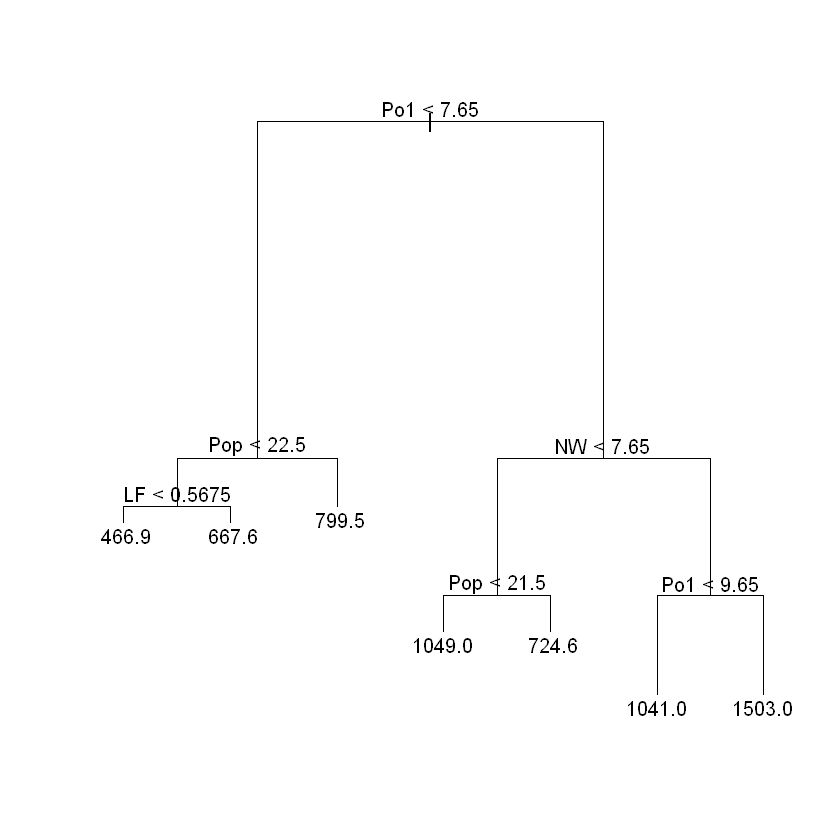

In [5]:
# prune the tree
desired_nodes<-7
tree_prune<-prune.tree(tree = crime_tree_model,best = desired_nodes)
plot(tree_prune)
text(tree_prune)

In [6]:
summary(tree_prune)


Regression tree:
tree(formula = Crime ~ ., data = data_raw)
Variables actually used in tree construction:
[1] "Po1" "Pop" "LF"  "NW" 
Number of terminal nodes:  7 
Residual mean deviance:  47390 = 1896000 / 40 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-573.900  -98.300   -1.545    0.000  110.600  490.100 

In [7]:
prune.tree(crime_tree_model)$dev

[1] 1895722 2013257 2276670 2632631 3364043 4383406 6880928

In [8]:
prune.tree(crime_tree_model)$size

[1] 7 6 5 4 3 2 1

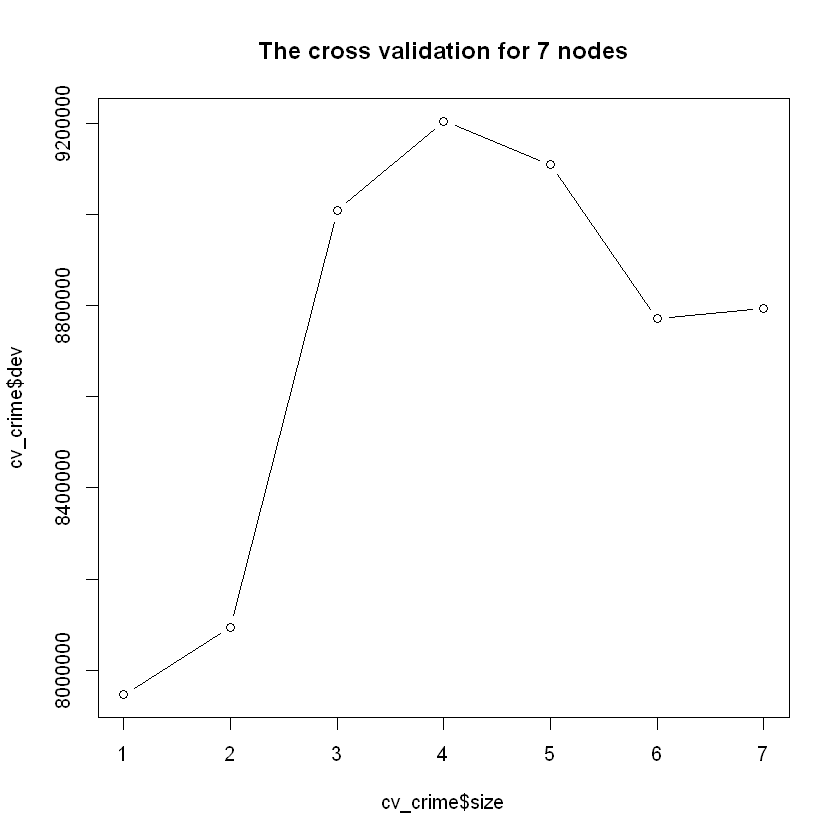

In [9]:
cv_crime<-cv.tree(crime_tree_model)
plot(cv_crime$size,cv_crime$dev,type='b')
title('The cross validation for 7 nodes')

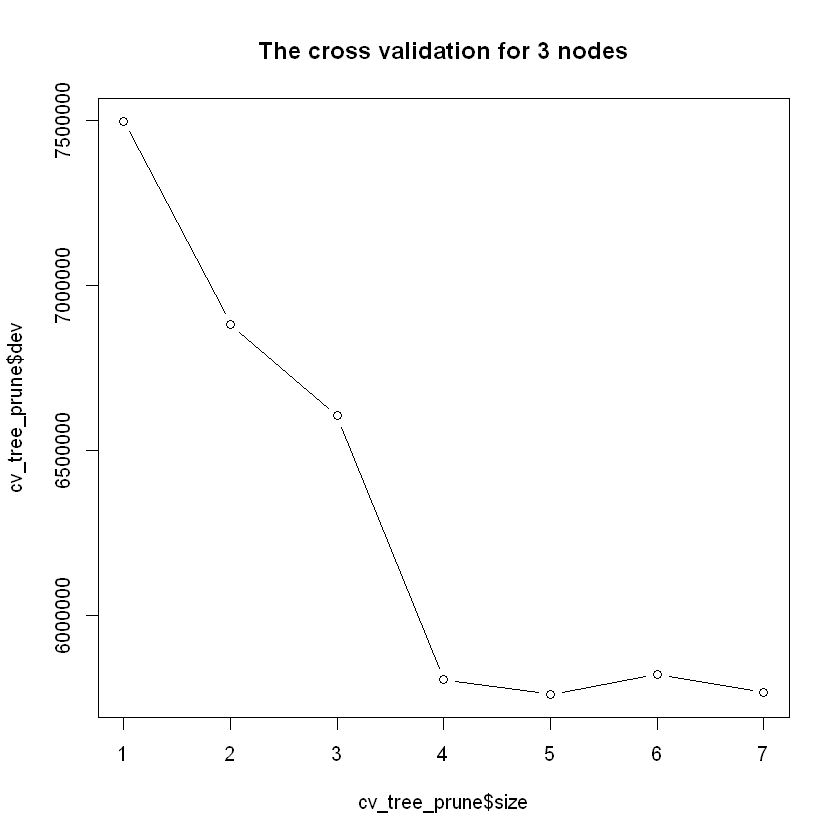

In [10]:
cv_tree_prune<-cv.tree(tree_prune)
plot(cv_tree_prune$size,cv_tree_prune$dev,type='b')
title('The cross validation for 3 nodes')

As per the above graphs it is possible to understand that the 7 node plot is providing the suitable answer comparing with the 3 nodes.

In [11]:
#calculating the quality of the fit by calculating the residual sum squared and dividing it by the true skill statistics
crime_tree_prediction<-predict(tree_prune,data=data_raw[,1:15])
RSS <- sum((crime_tree_prediction - data_raw[,16])^2)
TSS <- sum((data_raw[,16] - mean(data_raw[,16]))^2)
R2 <- 1 - RSS/TSS

In [39]:
R2

[1] 0.7244962

As it is difficult to check all the node sizes manually, it is useful to apply a loop and check the different accuracy for the various node numbers.

In [12]:
total_results<-data.frame(matrix(nrow = 5,ncol = 2))
colnames(total_results)<-c('NodeSize','R2')
i=1
for (desired_nodes in 3:7){
    crime_tree_model <- tree(formula = Crime ~. , data = data_raw)
    tree_prune<-prune.tree(tree = crime_tree_model,best = desired_nodes)
    
    predict <- predict(tree_prune,data=data_raw[,1:15])
    RSS <- sum((predict - data_raw[,16])^2)
    TSS <- sum((data_raw[,16] - mean(data_raw[,16]))^2)
    R2 <- 1 - RSS/TSS
    total_results[i,1]<-desired_nodes
    total_results[i,2]<-R2
    i=i+1
}

It sows that increasing the nodes to 7 can greatly improve the performance.

### Part b: Random forest
Part B of the assignment will focus on the random forest and compare the results with the decision tree

In [17]:
#Use the loaded data in the tree section of the analysis

In [19]:
number_features <- 1 + log(ncol(data_raw))
random_forest_model <- randomForest(Crime~., data = data_raw, mtry = number_features, importance = T, ntree = 600)


In [20]:
y_predicted <- predict(random_forest_model)
y_reference<-data_raw$Crime
RSS<-sum((y_predicted-y_reference)^2)
TSS<-sum((y_reference-mean(y_reference))^2)
RSQ<-1-RSS/TSS

In [21]:
importance(random_forest_model)

,%IncMSE,IncNodePurity
M,1.9443264,237795.75
So,2.0437821,23196.77
Ed,3.6304361,244507.06
Po1,13.5325017,1170350.26
Po2,12.8656628,1053817.43
LF,1.4690139,287869.95
M.F,1.4650766,307339.41
Pop,0.7565604,368026.69
NW,10.2800395,519784.66
U1,-0.1478492,147789.51


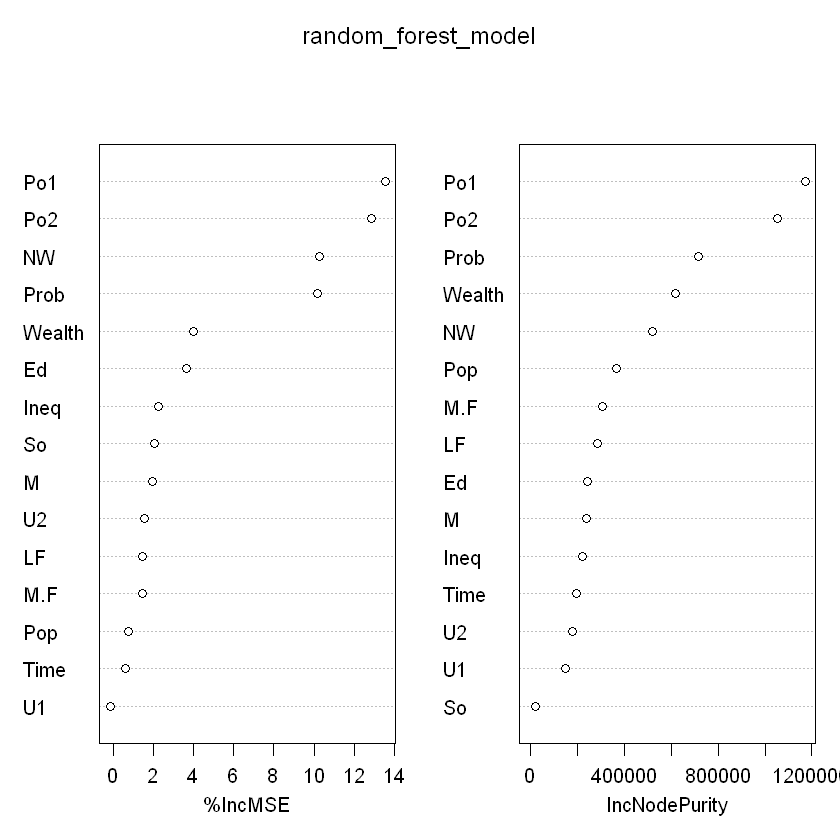

In [22]:
varImpPlot(random_forest_model)

### Q 10.2

Describe a situation or problem from your job, everyday life, current events, etc., for which a logistic regression model would be appropriate. List some (up to 5) predictors that you might use.

My job involves predicting the quality of the grain by using different data points collected using the internet of things sensors. I need to use the grain condition such as initial weight, protein level, initial moisture, crushing results and possible storage time as input to the developed algorithms and detremine the silo location for the optimum storage periods.

### Q 10.3


In [23]:
# Loading the data
raw_data<-read.table('http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data', header = FALSE)

In [24]:
head(raw_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [25]:
#Setting the index value to 0 and 1 
raw_data['V21'][raw_data['V21']==2]<-0

In [26]:
# we need to divide the data into train and test before moving forward with the modelling part.

data_sampling <- sample(1:nrow(raw_data), size = round(0.8*nrow(raw_data)))
train_data <- raw_data[data_sampling,]
test_data <- raw_data[-data_sampling,]

In [27]:
#Modelling part based on the logistic regression

machine_learning_model<- glm(formula=V21 ~.,family = binomial(link='logit'),data = train_data)
summary(machine_learning_model)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.7645  -0.6282   0.3493   0.6822   2.3979  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.848e-02  1.182e+00   0.033 0.974036    
V1A12        1.397e-01  2.481e-01   0.563 0.573295    
V1A13        8.700e-01  4.203e-01   2.070 0.038476 *  
V1A14        1.556e+00  2.622e-01   5.935 2.94e-09 ***
V2          -2.780e-02  1.064e-02  -2.612 0.008994 ** 
V3A31       -2.561e-01  6.199e-01  -0.413 0.679534    
V3A32        8.096e-01  4.914e-01   1.647 0.099456 .  
V3A33        1.383e+00  5.394e-01   2.564 0.010334 *  
V3A34        1.807e+00  4.978e-01   3.629 0.000284 ***
V4A41        1.674e+00  4.439e-01   3.770 0.000163 ***
V4A410       1.325e+00  9.077e-01   1.460 0.144379    
V4A42        9.020e-01  2.958e-01   3.050 0.002292 ** 
V4A43        8.490e-01  2.836e-01   2.994 0.002757 ** 
V4A44        4.58

In [28]:
#This part will focus on the model prediction  

logistic_model_prediction<-predict(object = machine_learning_model,data = test_data,type = 'response')
# yhat1 <- as.integer(yhat_logit > 0.5)
logistic_model_prediction_results<-as.integer(logistic_model_prediction > 0.5)

In [37]:
length(test_data[1][,])

[1] 200

In [38]:
test_data$V21
logistic_model_prediction

[1] 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1
 [38] 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 1 1
 [75] 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0
[112] 1 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0
[149] 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 1 0 1
[186] 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1

319        131        721        125        775        798        551 
0.85629386 0.52296638 0.65685618 0.58137779 0.85201415 0.86958018 0.97432664 
       722        928        767        650        284        724        485 
0.11125462 0.18945446 0.34918822 0.19643758 0.99116038 0.76133660 0.95747907 
       541        589        845        962        833        616        188 
0.65646394 0.53735602 0.66469747 0.52434130 0.07711384 0.37065994 0.90096746 
       127        388        296        239        185        121        664 
0.59231872 0.49474075 0.29551092 0.90260792 0.57380802 0.54085355 0.71110256 
       276        712        380        526        984          9        462 
0.94995948 0.12698143 0.91458318 0.57129274 0.47784772 0.99166428 0.60257220 
       540        566        443        503        405        408        676 
0.77559048 0.81270391 0.80319340 0.94071616 0.70836512 0.74828292 0.90013236 
        88        416         32        111        723        646        372 
0.25314131 0.96084210 0.54002738 0.79719185 0.31465697 0.79048852 0.94196175 
       948        571        978        653        897         28         85 
0.84447560 0.27066213 0.89982011 0.31123947 0.29190897 0.78792317 0.82619154 
       208        630        259        889         71        440        110 
0.88102755 0.97775857 0.97044620 0.75256190 0.77862982 0.70674662 0.91454586 
       730        301        801        802        297        595         58 
0.98058508 0.96365696 0.77120159 0.83551811 0.95029634 0.73129134 0.65810146 
       112        720        249        106        298        855        385 
0.30988059 0.41490033 0.87960046 0.47051850 0.95489937 0.64304068 0.93939273 
       312        482        304        793        781        776        659 
0.79574146 0.33339032 0.73409297 0.98695510 0.93400096 0.32948987 0.26792657 
       507        938        283        492         55        423        544 
0.98686731 0.45216691 0.83214710 0.28750930 0.37400757 0.89143933 0.84541060 
        68        678        935        834        223        437        152 
0.71503094 0.26444003 0.33928005 0.83823256 0.82133140 0.92330735 0.99137116 
       965        629        690         21        187        267        209 
0.48710511 0.90463324 0.80890744 0.88203129 0.58610944 0.95345024 0.29506947 
       207        806          8        161        401        324        611 
0.96410659 0.45790018 0.69885983 0.97957695 0.89026486 0.84591303 0.39648924 
       545        924        907        494         52        203        502 
0.94123754 0.55665366 0.89060116 0.90132764 0.92175730 0.93061009 0.63864326 
       770        389        497        413        867        904        254 
0.99092250 0.85485232 0.13214157 0.93272210 0.28032731 0.93300908 0.94972310 
       403        420        648        956        634        837        204 
0.80532658 0.53417530 0.80676159 0.91068011 0.54030418 0.91625650 0.77991443 
       231        446        439        169        818        564        703 
0.56748047 0.86794612 0.39341976 0.89093311 0.98237813 0.46245799 0.86058351 
       673        657        406        994        914        896        565 
0.53985375 0.29760604 0.68660970 0.37908824 0.99221697 0.97223796 0.77683699 
       844        444        562        222         36        803        698 
0.85570381 0.58931622 0.36475161 0.24979808 0.38527805 0.75374637 0.96396532 
        43         97         24        230        370        835        525 
0.71891271 0.97739175 0.96416036 0.27153985 0.76798476 0.76862207 0.57569581 
        12        679        953        333        474        926        116 
0.13849503 0.48895205 0.45636482 0.07009414 0.98202711 0.14662854 0.98192149 
       943        580        518        850        219        328        751 
0.97526345 0.83962714 0.69610526 0.73778652 0.38812145 0.92913987 0.81932100 
       415        893        937        583        800        429        656 
0.45476354 0.68585162 0.82309

In [30]:
# The confusion matrix is not created as for some reason the result of the prediction is not match with the size 
# of the data which we have entered.??
table(test_data$V21,test_data$V21)
table(test_data$V21,logistic_model_prediction_results)

   
      0   1
  0  58   0
  1   0 142

ERROR: Error in table(test_data$V21, logistic_model_prediction_results): all arguments must have the same length


In [ ]:
# The functionality test can be applied as follows. ?? the size of the test_data and the prediction is not matched for some reason

AUC<-roc(test_data$V21,logistic_model_prediction_results)